In [1]:
import sys
sys.path.append("../Pre-Processing")
sys.path.append("../Pre-Processing/methods")
from freqDomain import FFT
from timeDomain import *
from prepare_data import parse
from scipy import signal
import matplotlib.pyplot as plt
from obspy.signal.filter import bandstop
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [36]:
labels = pickle.load(open("/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.DatLabl"))[1]

In [37]:
rawData = parse("/Users/williamlevine/Downloads/OpenBCI-RAW-Mixture-Trial-4.txt", numChannels = 4)
rawFFT = FFT(rawData)[3]
stdRawFFT = np.array([np.std(rawFFT[i]) for i in range(len(rawFFT))])
hPassFFT = FFT(bandStop(lowPass(highPass(rawData)), 55, 65))[3]
stdHighPassFFT = np.array([np.std(hPassFFT[i]) for i in range(len(hPassFFT))])

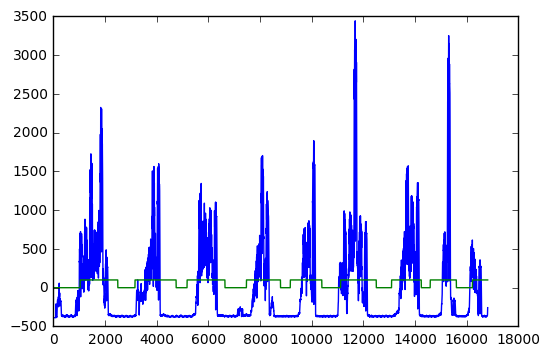

In [38]:
plt.plot(stdHighPassFFT - np.mean(stdHighPassFFT))
plt.plot(labels * 100)
plt.show()